In [131]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_05_17-19-49.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')
print (param_str)

[3.3, 68000]


In [46]:
import numpy as np
import pandas as pd

data = pd.read_csv(file, header=None, sep = "\t")
print (data, '\n')
#print (data[0], '\n')

                0         1
0               5  0.011250
1            1006  0.010750
2            2006  0.010500
3            3007  0.011000
4            4007  0.011000
...           ...       ...
997997  118489033  0.056375
997998  118490033  0.056125
997999  118491033  0.056375
998000  118492034  0.056000
998001  118493034  0.056250

[998002 rows x 2 columns] 



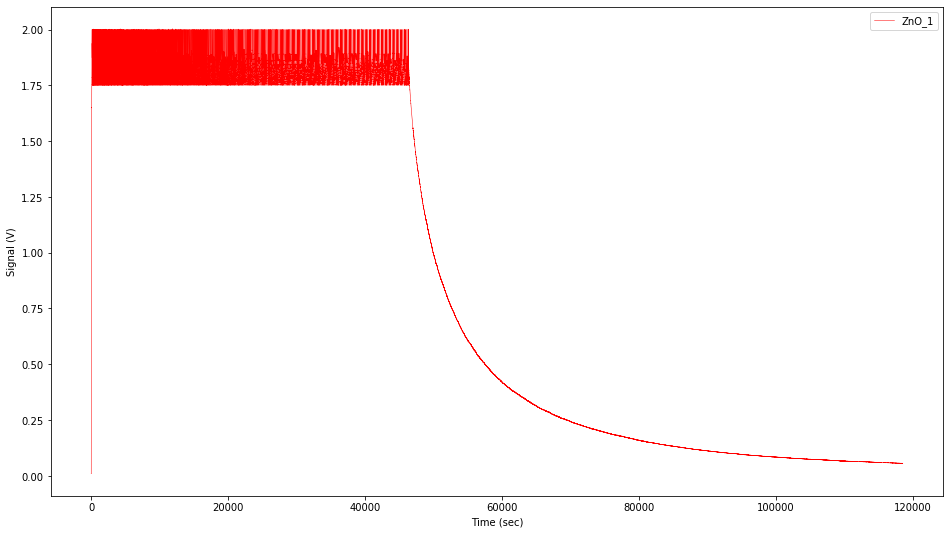

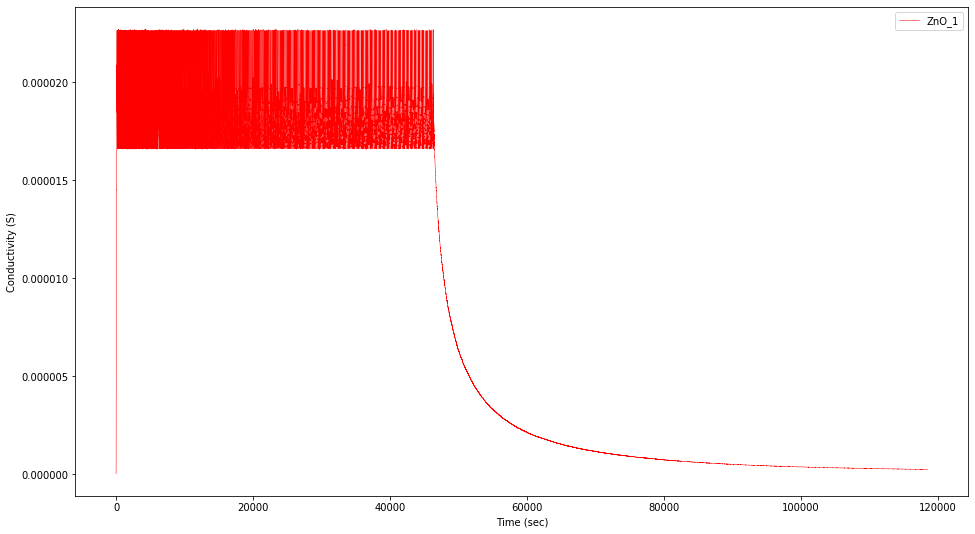

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = data[0]/1000
y = data[1]

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Signal (V)")
#plt.title("Time dependence")
#ax.axis([0, 47000, 1.5, 2.25])

 ######################## 2 график ##########################
plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = data[0]/1000
y = 1/((param_str[0] - data[1])*param_str[1]/data[1])

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Conductivity (S)")
#plt.title("Time dependence")
#ax.axis([0, 47000, 0.0000125, 0.0000275])
plt.show()

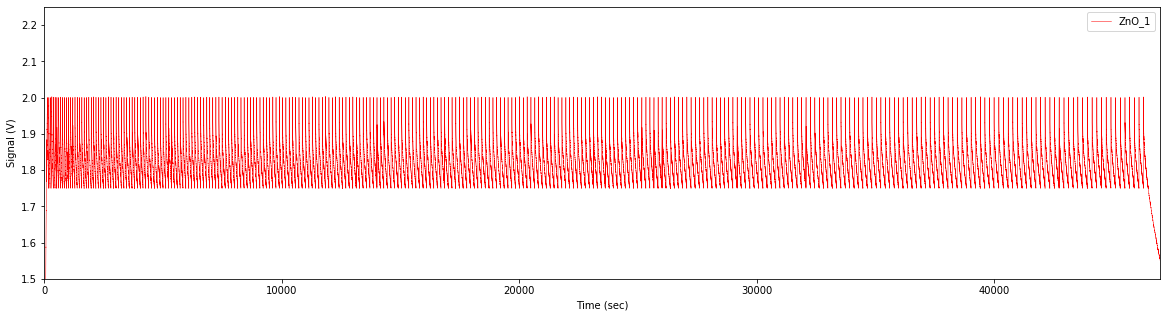

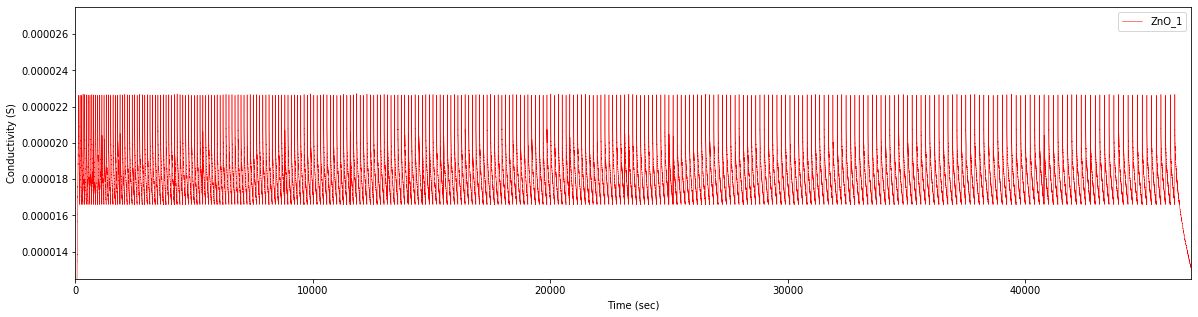

In [48]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)  # Размер картинок

x = data[0]/1000
y = data[1]

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Signal (V)")
#plt.title("Time dependence")
ax.axis([0, 47000, 1.5, 2.25])

 ######################## 2 график ##########################
plt.rcParams['figure.figsize'] = (20, 5)  # Размер картинок

x = data[0]/1000
y = 1/((param_str[0] - data[1])*param_str[1]/data[1])

fig, ax = plt.subplots()
ax.set_facecolor('w') # установка фона графика

ax.plot(x, y, linewidth = 0.5, label="ZnO_1", color='r')
ax.legend()
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Conductivity (S)")
#plt.title("Time dependence")
ax.axis([0, 47000, 0.0000125, 0.0000275])
plt.show()

In [215]:
import numpy as np
a = np.array([[1,3]])
b = np.array([[1,2]])
a = np.vstack((a, b))
print (a)

[[1 3]
 [1 2]]


In [243]:
import numpy as np
import pandas as pd

def on_off_impulse(file): # функция, которая создает колонки с ON / OFF. В качестве параметра принимает имя файла

    f = open(file, 'r')
    line = f.readline()
    line_buf = line
    flag = 0

    #pd.options.display.max_colwidth = 1000
    res = pd.DataFrame(columns = ['N','on_start_t','on_start_V','on_end_t','on_end_V','off_start_t','off_start_V','off_end_t','off_end_V'])

    on_start = np.array([]) # создание массива ON
    i_on_start = 1

    on_end = np.array([])
    i_on_end = 1

    off_start = np.array([]) # создание массива OFF
    i_off_start = 1

    off_end = np.array([])
    i_off_end = 0

    while (line):
        if (line == "\n"):
            if (flag == 0):
                line_buf = line_buf.replace('\n', "") # удаление символа \n
                a = line_buf.split("\t")  # разбиение по \t
                res.loc[i_off_end, 'off_end_t'] = float(a[0])/1000
                res.loc[i_off_end, 'off_end_V'] = float(a[1])
                res.loc[i_off_end, 'N'] = i_off_end
                #print ('off', i_off_end, a, "\n")
                i_off_end += 1

                line = f.readline()
                if (line):
                    line = line.replace('\n', "")
                    b = line.split("\t")
                    res.loc[i_on_start, 'on_start_t'] = float(b[0])/1000
                    res.loc[i_on_start, 'on_start_V'] = float(b[1])
                    res.loc[i_on_start, 'N'] = i_on_start
                    #print ('on', i_on_start, b, "\n")
                    i_on_start += 1
                else:
                    break

                flag = 1 # переназначение FLAG
            else:
                if (flag == 1):
                    line_buf = line_buf.replace('\n', "")
                    a = line_buf.split("\t")
                    res.loc[i_on_end, 'on_end_t'] = float(a[0])/1000
                    res.loc[i_on_end, 'on_end_V'] = float(a[1])
                    res.loc[i_on_end, 'N'] = i_on_end
                    #print ('on', i_on_end, a, "\n")
                    i_on_end += 1

                    line = f.readline()
                    if (line):
                        line = line.replace('\n', "")
                        b = line.split("\t")
                        res.loc[i_off_start, 'off_start_t'] = float(b[0])/1000
                        res.loc[i_off_start, 'off_start_V'] = float(b[1])
                        res.loc[i_off_start, 'N'] = i_off_start
                        #print ('off', i_off_start, b, "\n")
                        i_off_start += 1
                    else:
                        break

                    flag = 0

        line_buf = line
        line = f.readline()
    f.close()
    return (res)

res = on_off_impulse(file)
#res = res.drop(0)
print (res.head().to_string()) # конструкция позволяет выводить много колонок // head() - число строчек

   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.011  0.010375
1  1      11.03     0.0155  137.675  2.00038      137.73      1.9765   183.008    1.7495
2  2    183.075    1.80313  195.729  2.00038     195.785     1.97925   246.869   1.74975
3  3    246.935    1.80212   256.28  2.00013     256.335     1.98263   313.413   1.74962
4  4    313.479     1.8055   321.57  2.00237     321.626     1.98125   384.316   1.74975


   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN    10.011  0.010375
1  1      11.03     0.0155  137.675  2.00038      137.73      1.9765   183.008    1.7495
2  2    183.075    1.80313  195.729  2.00038     195.785     1.97925   246.869   1.74975
3  3    246.935    1.80212   256.28  2.00013     256.335     1.98263   313.413   1.74962
4  4    313.479     1.8055   321.57  2.00237     321.626     1.98125   384.316   1.74975


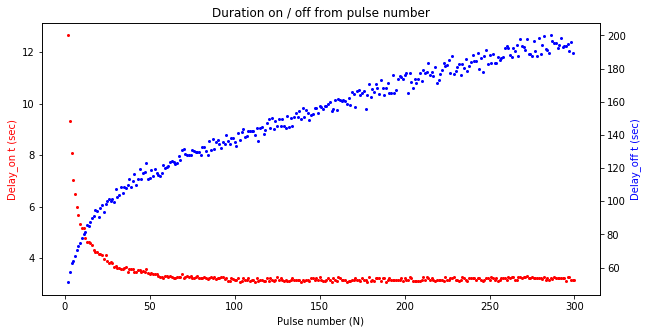

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print (res.head().to_string())

#plt.rcParams['figure.figsize'] = (16, 9)  # Размер картинок

x = res['N'].drop(1)
y_on = res['on_end_t'].drop(1) - res['on_start_t'].drop(1)
y_off = res['off_end_t'].drop(1) - res['off_start_t'].drop(1)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок

fig, ax1 = plt.subplots()
ax1.set_facecolor('w') # установка фона графика
ax2 = ax1.twinx() # позволяет вывести 2 графика на 1

curve1 = ax1.scatter(x, y_on, s=4, label="on", color='r')
curve2 = ax2.scatter(x, y_off, s=4, label="off", color='b')
curves = [curve1, curve2]
#ax1.legend(curves, [curve.get_label() for curve in curves], facecolor="yellow") # ??? отображение легенды

ax1.set_xlabel("Pulse number (N)")
ax1.set_ylabel("Delay_on t (sec)", color = 'red')
ax2.set_ylabel("Delay_off t (sec)", color = 'blue')
plt.title("Duration on / off from pulse number")
#ax1.axis([0, 50, 0, 15])
к
plt.grid(False) # отключение сетки
plt.show()